<center><img src='https://images.squarespace-cdn.com/content/v1/5ee601405ce62276749db24a/dcb6d2e1-4ffd-477e-b495-50d163bed7a2/CentraleSupelec+logo.png' width=200></center>


<h6><center></center></h6>

<h1>
<hr style=" border:none; height:3px;">
<center>Systèmes Multi-Agents</center>
    <center>Deuxième partie : découverte de la bibliothèque Mesa</center>
<hr style=" border:none; height:3px;">
</h1>



# Objectif

Nous allons programmer un système multi-agent en utilisant la bibliothèque Mesa qui permet réalise les fonctions essentielles d'un SMA synchrone avec interactions indirectes. Ce TP est largement inspiré du tutoriel proposé sur le site de la bibliothèque Mesa.

<div class ="alert alert-block alert-success">
    <b>Remarques :</b>
    <ul>
        <li>Pour réaliser un SMA en python, il faut forcément « bricoler » un peu.</li>
        <li>Les applications industrielles des SMA utilisent plutôt des plateformes en Java comme Repast Symphony ou Jade.</li>
    </ul>
</div>

## Prérequis

Pour fonctionner, Mesa a besoin d'un certain nombre de bibliothèques. Commencez par exécuter cette celle pour installer la bibliothèque Mesa :

In [1]:
%pip install --quiet --upgrade mesa
%pip install --quiet --upgrade seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
!pip install -r requirements.txt

### Test

Attendez de voir **deux fois** le message « *Note: you may need to restart the kernel to use updated packages* » et vérifiez que cela fonctionne en exécutant la cellule suivante:

In [2]:
import mesa
from mesa import *
from random import *
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:

print(f"Mesa version: {mesa.__version__}")


Mesa version: 3.1.4


<div class ="alert alert-block alert-success">
    <b>S'il n'y a pas de message d'erreur, c'est que tout est bon. Vous pouvez continuer</b>
</div>

## C'est parti !

En Mesa, les agents sont construits en utilisant la classe Agent avec de l'héritage, comme nous l'avons fait en fin de matinée. Construisons un agent `MoneyAgent` contenant juste un attribut `wealth` initialisé à 1 et une boucle procédurale minimale qui affiche un message :

In [3]:
class MoneyAgent(Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, model):
        # Pass the parameters to the parent class.
        super().__init__(model)

        # Create the agent's variable and set the initial values.
        self.wealth = 1

    def step_agent(self):
        # The agent's step will go here.
        # For demonstration purposes we will print the agent's unique_id
        print(f"Hi, I am an agent, you can call me {str(self.unique_id)}.")


**(n'oubliez pas d'exécuter la cellule ci-dessus)**

Vous noterez les paramètres du constructeur :
* un identifiant unique
* un *model* qui correspond à l'environnement ou au *runtime* vu ce matin

Ainsi que le nom de la méthode décrivant la **boucle procédurale** : `step`.


Construisons maintenant une classe héritant de `Model` pour définir l'environnement d'exécution. Nous écrivons aussi une méthode `step` qui demande au scheduleur d'exécuter tous les agents 1 fois (nous sommes dans un SMA synchrone). *Cette méthode sera utilisée par l'interface de visualisation que nous verrons en fin de séance.*

In [4]:
class MoneyModel(Model):
  """A model with some number of agents."""

  def __init__(self, N, seed=None):
        super().__init__(seed=seed)
        for i in range(N):
            newagent = MoneyAgent(self)


  def step(self):
      self.agents.shuffle_do("step_agent")



In [5]:
#Running the Model
starter_model = MoneyModel(4)
for i in range(3):
  starter_model.step()

Hi, I am an agent, you can call me 3.
Hi, I am an agent, you can call me 1.
Hi, I am an agent, you can call me 2.
Hi, I am an agent, you can call me 4.
Hi, I am an agent, you can call me 3.
Hi, I am an agent, you can call me 2.
Hi, I am an agent, you can call me 1.
Hi, I am an agent, you can call me 4.
Hi, I am an agent, you can call me 1.
Hi, I am an agent, you can call me 4.
Hi, I am an agent, you can call me 2.
Hi, I am an agent, you can call me 3.


Vous pouvez maintenant exécuter votre SMA !

Vous voyez peut-être un avertissement (message rouge). Ce n'est pas grave, vous pouvez l'ignorer.

<div class ="alert alert-block alert-success">
    <b>Notez que l'ordre des agents change à chaque tour.</b>
</div>

## À vous de jouer !

Nous allons implémenter un modèle multiagent pour étudier la distribution des richesses au sein d'une population d'agents. Chaque agent commence avec une unité de richesse (**wealth**). À chaque tour de boucle procédurale, un agent qui a une valeur de richesse positive sélectionne aléatoirement un agent dans la liste des agents et lui donne une unité. Nous allons voir que cela produit naturellement des inégalités de richesses en suivant une distribution de Boltzmann (http://www.phys.ufl.edu/~meisel/Boltzmann.pdf).

Pour cela, vous devez donc reprendre le code ci-dessous et modifier la fonction `step` des agents pour qu'ils effectuent les actions suivantes :
- Vérifier leur valeur de `wealth`;
- Si elle est positive, sélectionner un agent et lui donner **1 wealth**.

Pour sélectionner un agent au hasard, vous pouvez utiliser :
- L'attribut `agents` du *scheduler* (auquel vous ouvez accéder depuis l'agent par `self.model.schedule.agents`)
- La fonction `choice` de la bibliothèque *random* (à laquelle vous pouvez accéder directement puisque nous l'avons importée)

Pour afficher la répartition des richesses, nous utiliserons le code fourni.

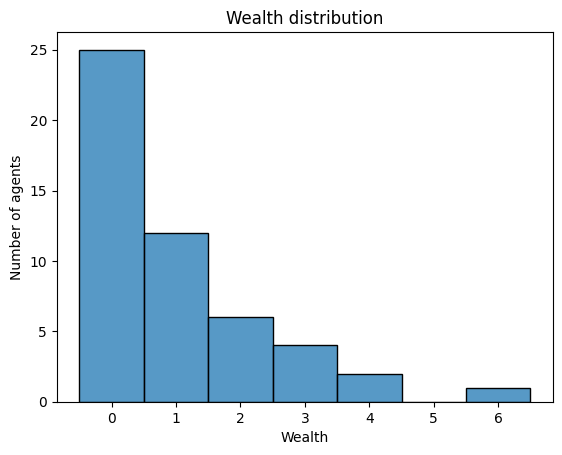

In [6]:
class MoneyAgent(Agent):

    def __init__(self, model):
        # Pass the parameters to the parent class.
        super().__init__(model)
        self.wealth = 1

    def step_agent(self):
      pass

      # A COMPLETER

class MoneyAgent(Agent):
    def __init__(self, model):
        # Pass the parameters to the parent class.
        super().__init__(model)
        self.wealth = 1

    def step_agent(self):
        if self.wealth > 0:
            other_agent = self.random.choice(self.model.agents)
            if other_agent is not None:
                other_agent.wealth += 1
                self.wealth -= 1


# Fonction pour afficher la distribution des richesses
def show_wealth_distribution(model):
    # Create a histogram with seaborn
    agent_wealth = [a.wealth for a in model.agents]
    g = sns.histplot(agent_wealth, discrete=True)
    g.set(
        title="Wealth distribution", xlabel="Wealth", ylabel="Number of agents"
    );  # The semicolon is just to avoid printing the object representation
    plt.show()

# Exécution de 50 agents sur 1000 pas de temps
def run_test():
    model = MoneyModel(50)
    for i in range(1000):
        model.step()
    show_wealth_distribution(model)

run_test()

<div class ="alert alert-block alert-success">

<b>Correction ci-après</b>


</div>   


### Correction
**Attention :** ne regardez pas tout de suite la correction ! Essayez d'abord de le faire vous-même !

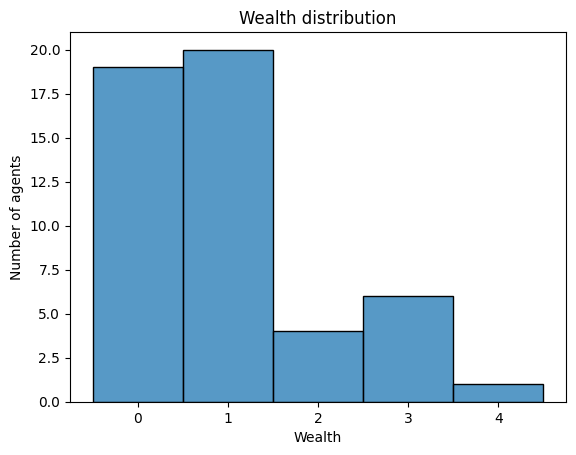

In [7]:
class MoneyAgent(Agent):
    def __init__(self, model):
        # Pass the parameters to the parent class.
        super().__init__(model)
        self.wealth = 1

    def step_agent(self):
        if self.wealth > 0:
            other_agent = self.random.choice(self.model.agents)
            if other_agent is not None:
                other_agent.wealth += 1
                self.wealth -= 1


# Fonction pour afficher la distribution des richesses
def show_wealth_distribution(model):
    # Create a histogram with seaborn
    agent_wealth = [a.wealth for a in model.agents]
    g = sns.histplot(agent_wealth, discrete=True)
    g.set(
        title="Wealth distribution", xlabel="Wealth", ylabel="Number of agents"
    );  # The semicolon is just to avoid printing the object representation
    plt.show()

# Exécution de 50 agents sur 1000 pas de temps
def run_test():
    model = MoneyModel(50)
    for i in range(1000):
        model.step()
    show_wealth_distribution(model)

run_test()

## Ajout d'un environnement « Grille »

Dans beaucoup de systèmes multi-agents, les agents sont positionnés dans l'espace, se déplacent et interagissent avec leurs voisins. Mesa propose plusieurs environnements pour situer géographiquement les agents. Nous allons utiliser l'environnement `MultiGrid` qui, comme son nom l'indique, consiste en une grille dans laquelle chaque case peut héberger un ou plusieurs agents.

Dans le code ci-dessous, nous créons une grille **de taille width x height**, avec une topologie **torique** (le bord gauche rejoint le bord droit, idem pour le bord haut et le bord bas), et nous plaçons aléatoirement nos agents sur la grille à l'aide de la méthode `place_agent`.

Chaque agent dispose d'un attribut `pos` qui définit sa position. Lorsqu'on appelle la méthode `place_agent`, cela modifie aussi la valeur de `pos`.

In [8]:
from mesa.space import MultiGrid

class MoneyModel(Model):
    """A model with some number of agents."""

    def __init__(self, N=100, width=10, height=10, seed=None):
        """Initialize the model.

        Args:
            n (int, optional): Number of agents. Defaults to 100.
            width (int, optional): Grid width. Defaults to 10.
            height (int, optional): Grid height. Defaults to 10.
            seed (int, optional): Random seed. Defaults to None.
        """
        super().__init__(seed=seed)
        self.grid = MultiGrid(width, height, torus=True) # toroidal
        for i in range(N):
            agent = MoneyAgent(self)

            # Add agent to random grid cell
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(agent, (x, y))


    def step(self):
        self.agents.shuffle_do("step_agent")


# Nous avons redéfini run_test() pour créer une grille de taille 10x10
def run_test():
    model = MoneyModel(50,10,10)
    for i in range(1000):
        model.step()
    show_wealth_distribution(model)

**(n'oubliez pas d'exécuter la cellule ci-dessus)**

### À vous de jouer

Modifiez le code précédent de manière à ce que les agents se déplacent aléatoirement à chaque tour et n'échangent de richesse qu'avec les agents proches d'eux.

N'oubliez pas que vous pouvez utiliser l'attribut `self.pos` pour récupérer la position courante de votre agent.

Pour calculer les case voisines, il existe dans la classe `MultiGrid` une méthode `get_neighborhood` qui vous revoie les cases voisines. Elle s'utilise de la manière suivante :

`get_neighborhood(
            self.pos, moore=True, include_center=False
        )`

Le paramètre **moore** permet d'indiquer si vous voulez les 8 cases voisines (voisinage de Moore) ou seulement les 4 (haut, bas, gauche et droite : voisinage de Von Neumann). Le paramètre **include_center** vous permet d'indiquer si la case passée dans **position** doit être prise en compte ou non.

Enfin, pour récupérer la liste des agents dans les cellules voisines, vous pouvez utiliser la méthode `get_cell_list_contents` de la classe `MultiGrid` qui prend en paramètre la **liste des cases** dans lesquelles il faut chercher des agents (dans notre cas, `[self.pos]`).

In [ ]:
class MoneyAgent(Agent):

   def __init__(self, model):
        # Pass the parameters to the parent class.
        super().__init__(model)
        self.wealth = 1

   def step(self):
      pass

        # A COMPLETER

# test
run_test()

<div class ="alert alert-block alert-success">

<b>Correction ci-après</b>


</div>   


### Correction
**Attention :** ne regardez pas tout de suite la correction ! Essayez d'abord de le faire vous-même !

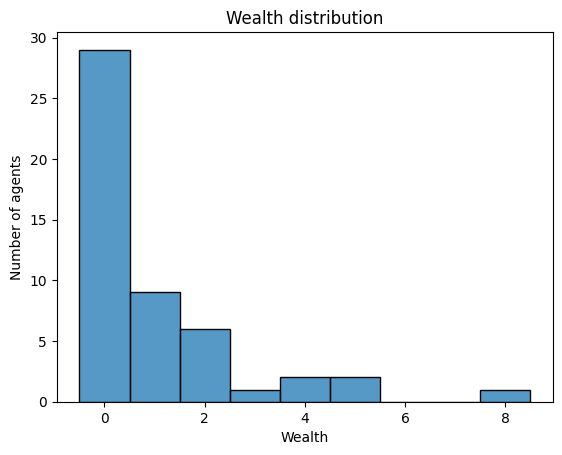

In [9]:
class MoneyAgent(Agent):
    def __init__(self, model):
        # Pass the parameters to the parent class.
        super().__init__(model)
        self.wealth = 1

    def step_agent(self):
        # move
        neighbors = self.model.grid.get_neighborhood(
            self.pos, moore=True, include_center=False
        )
        new_position = self.random.choice(neighbors)
        self.model.grid.move_agent(self, new_position)
        # give
        if self.wealth > 0:
            cellmates = self.model.grid.get_cell_list_contents([self.pos])
            if len(cellmates) > 1:
                other = choice(cellmates)
                other.wealth += 1
                self.wealth -= 1


# test
run_test()

## Un deuxième type d'agent

Le SMA que nous avons implémenté jusqu'ici pourrait laisser penser qu'on utilise une seule classe d'agent dans un SMA en Mesa. Ce n'est pas le cas. Comme pour l'exemple de ce matin, nous avons généralement besoin de définir des classes différentes selon les type d'agents.

Modifiez la simulation précédente en introduisant, en plus des **N** agents MoneyAgent, **M** agents *Robin des bois* qui sélectionnent un agent au hasard et prennent 50% de sa richesse pour les redistribuer aléatoirement (1 point par agent destinataire). Dès qu'ils possèdent 3 point de richesse ou plus, ils prennent sur leur richesse au lieu de la prendre à un autre agent.

In [ ]:
class MoneyModel(Model):

    # N = MoneyAgent
    # M = RobinHoodAgent
    # width, height = width and height of the grid

    def __init__(self, N, M, width, height, seed=None):

        super().__init__(seed=seed)

        # A COMPLETER


    # La méthode step pour exécuter le modèle ne change pas
    def step(self):
        self.agents.shuffle_do("step_agent")

class RobinHoodAgent(Agent):
  pass

    # A COMPLETER


# Nous avons redéfini run_test() pour y intégrer les agents robins des bois
def run_test():
    model = MoneyModel(50,2,10,10)
    for i in range(1000):
        model.step()
    show_wealth_distribution(model)
# test
run_test()

<div class ="alert alert-block alert-success">

<b>Correction ci-après</b>


</div>   


### Correction
**Attention :** ne regardez pas tout de suite la correction ! Essayez d'abord de le faire vous-même !

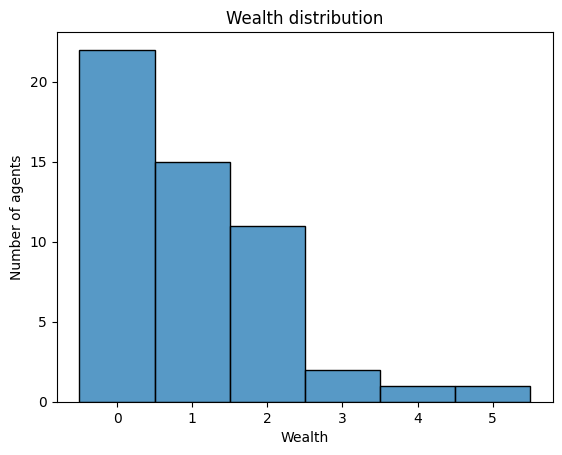

In [10]:
class MoneyModel(Model):

    # N = MoneyAgent
    # M = RobinHoodAgent
    # width, height = width and height of the grid

    def __init__(self, N, M,width, height, seed=None):

        super().__init__(seed=seed)
        self.grid = space.MultiGrid(width, height, True)
        self.num_wanderers = N
        for i in range(N):
            agent = MoneyAgent(self)

            # Add agent to random grid cell
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(agent, (x, y))


        for i in range(M):
            a = RobinHoodAgent(self)

    def step(self):
        self.agents.shuffle_do("step_agent")

class RobinHoodAgent(Agent):
    def __init__(self, model):
        super().__init__(model)
        self.wealth = 1

    def step_agent(self):
        if self.wealth > 2:
            other_agent = self
        else:
            other_agent = choice(self.model.agents)
        if other_agent is not None:
            w = other_agent.wealth//2
            other_agent.wealth -= w
            for i in range(w):
                other_agent = choice(self.model.agents)
                if other_agent is not None:
                    other_agent.wealth += 1

# Nous avons redéfini run_test() pour y intégrer les agents robins des bois
def run_test():
    model = MoneyModel(50,2,10,10)
    for i in range(1000):
        model.step()
    show_wealth_distribution(model)
# test
run_test()

## Calcul du coefficient de Gini (en vue de la visualisation)

Le coefficient de Gini (ou *indice* de Gini) est une mesure statistique de l'inégalité de la répartition d'une variable dans une population. Dans notre cas, il permet de rendre compte de l'inégalité de richesse parmi nos agents. Un coefficient de Gini de 0 signifie l'égalité parfaite (tous les agents ont la même richesse) et 1 signifie une inégalité parfaite (un seul agent dispose de toutes les richesses et tous les autres n'ont rien).

Le coefficient de Gini se calcule de la manière suivante :

In [11]:
# G = E / (2*M) with E the

def compute_gini(model):
    agent_wealths = [agent.wealth for agent in model.agents]
    x = sorted(agent_wealths)
    n = model.num_wanderers
    B = sum(xi * (n - i) for i, xi in enumerate(x)) / (n * sum(x))
    return 1 + (1 / n) - 2 * B

**(n'oubliez pas d'exécuter la cellule ci-dessus)**

### À vous de jouer

Affichez le coefficient de Gini pour deux simulations, l'une avec des agents robins des bois et l'autre sans. Que constatez-vous ?

In [ ]:
#
#
# RÉPONDEZ DANS CETTE CELLULE
#
#

<div class ="alert alert-block alert-success">

<b>Correction ci-après</b>


</div>   


### Correction
**Attention :** ne regardez pas tout de suite la correction ! Essayez d'abord de le faire vous-même !

In [12]:
# sans
model = MoneyModel(50,0,10,10)
for i in range(1000):
    model.step()
g1 = compute_gini(model)

# avec
model = MoneyModel(50,2,10,10)
for i in range(1000):
    model.step()
g2 = compute_gini(model)

# résultat
print("sans = {}, avec = {}".format(g1,g2))

sans = 0.6992, avec = 0.6646153846153846


## Collect de données (en vue de la visualisation)

Mesa propose des fonctions pour collecter les variables des agents et du modèle. Nous allons avoir besoin de ces fonctions pour visualiser l'évolution du coefficient de Gini dans la simulation.

La collecte de données se fait à l'aide de la classe `DataCollector`. Nous allons commencer par importer cette classe :

In [13]:
from mesa.datacollection import DataCollector

**(n'oubliez pas d'exécuter la cellule ci-dessus)**

Nous allons devoir ajouter au modèle un objet de type `DataCollector` en lui donnant en paramètre les variables que nous souhaitons observer. Cela s'écrit de la manière suivante :

In [14]:
class MoneyModel(Model):
    def __init__(self, N, M, width, height):
        super().__init__()
        self.grid = space.MultiGrid(width, height, True)
        self.num_wanderers = N
        for i in range(N):
            a = MoneyAgent(self)
            x = randrange(self.grid.width)
            y = randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))
        for i in range(M):
            a = RobinHoodAgent(self)

        # Ajout du collecteur
        self.datacollector = DataCollector(agent_reporters={"Wealth": "wealth"},
                                           model_reporters={"Gini": compute_gini})

    def step(self):
      self.datacollector.collect(self)
      self.agents.shuffle_do("step_agent")

**(n'oubliez pas d'exécuter la cellule ci-dessus)**

Vous remarquerez que nous avons passé deux arguments au collecteur :

* `agent_reporter` pour les données à collecter chez les agents
* `model_reporter` pour les données à collecter sur le modèle

L'argument doit être un dictionnaire dont les clefs sont le nom que nous souhaitons attribuer à la valeur collectée, et les valeurs sont :

* soit des chaînes de caractères indiquant l'attribut à collecter
* soit des fonctions qui prendront en paramètre l'agent ou le modèle (selon le type de *reporter*)

Prenez le temps de comprendre ce code et demandez aux enseignants si vous ne comprenez pas ce qui est exécuté.

### Récupération des données

Nous avons modifié la méthode `step` de la classe `MoneyModel` pour **collecter les données à chaque tour de boucle** de notre SMA. Elles ont été stockées dans le *collecteur* et nous pouvons les récupérer à l'aide des instructions suivantes :

* `model.datacollector.get_agent_vars_dataframe()` pour les agents
* `model.datacollector.get_model_vars_dataframe()` pour le modèle

Nous pouvons ainsi afficher la courbe du coefficient de Gini dans le temps à l'aide du code suivant :

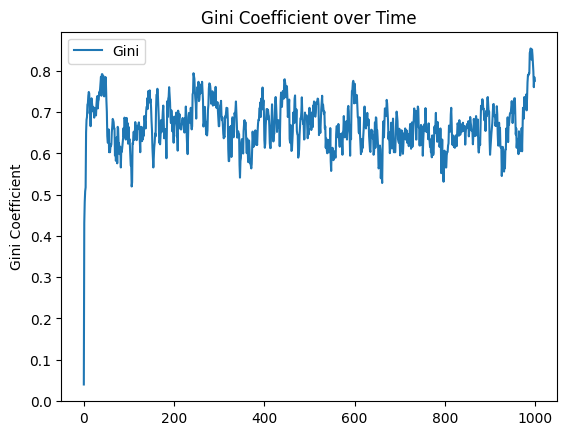

In [15]:
model = MoneyModel(50,2,10,10)
for i in range(1000):
    model.step()

gini = model.datacollector.get_model_vars_dataframe()
g = sns.lineplot(data=gini)
g.set(title="Gini Coefficient over Time", ylabel="Gini Coefficient");
plt.show()

## Visualisation

Pour la suite du TP, nous allons devoir utiliser une version native de Mesa, c'est à dire en dehors du Notebook Jupyter, afin de lancer le serveur de visualisation. Pour cela, vous allez devoir :

1. Créez un nouveau projet Python dans l'environnement de développement VSCODE (par exemple dans un répertoire dedié, ou a minima dans un nouveau fichier .py).
2. Recopiez le code de votre modèle et de vos agents **avec le collecteur de données** dans le fichier python. N'oubliez pas de recopie aussi le code de la fonction `compute_gini`. Vous devrez ajouter les import, mais pas l'instruction `%matplotlib inline` qui est propre à Jupyter.
3. Testez votre code **avant d'aller plus loin**.

#### Création de l'interface de visualisation

Pour afficher l'interface de visualisation de Mesa, nous allons faire appel à la classe `ModularServer` de Mesa.
Nous allons d'abord devoir définir une fonction pour dessiner les agents :

In [16]:
!pip install solara

In [8]:
import solara
from matplotlib.figure import Figure

from mesa.visualization.utils import update_counter

from mesa.visualization import SolaraViz, make_plot_component, make_space_component
# Import the local MoneyModel.py
from MoneyModel2 import MoneyModel

In [9]:
def agent_portrayal(agent):
    size = 10
    color = "tab:red"
    if agent.wealth > 0:
        size = 50
        color = "tab:blue"
    return {"size": size, "color": color}

In [10]:
model_params = {
    "n": {
        "type": "SliderInt",
        "value": 50,
        "label": "Number of agents:",
        "min": 10,
        "max": 100,
        "step": 1,
    },
    "width": 10,
    "height": 10,
}

In [11]:
@solara.component
def Histogram(model):
    update_counter.get() # This is required to update the counter
    # Note: you must initialize a figure using this method instead of
    # plt.figure(), for thread safety purpose
    fig = Figure()
    ax = fig.subplots()
    wealth_vals = [agent.wealth for agent in model.agents]
    # Note: you have to use Matplotlib's OOP API instead of plt.hist
    # because plt.hist is not thread-safe.
    ax.hist(wealth_vals, bins=10)
    solara.FigureMatplotlib(fig)

In [12]:
# Create initial model instance
money_model = MoneyModel(n=50,  width=10, height=10)

SpaceGraph = make_space_component(agent_portrayal)
GiniPlot = make_plot_component("Gini")

In [13]:
page = SolaraViz(
    money_model,
    components=[SpaceGraph, GiniPlot, Histogram],
    model_params=model_params,
    name="Money Model",
)
# This is required to render the visualization in the Jupyter notebook
page

Cannot show ipywidgets in text

<div class ="alert alert-block alert-success">
    <b>Testez votre code et l'interface graphique</b>
</div>